## **Discriminante lineal**

Técnicamente el análisis discriminante asume que los atributos son variables continuas normalmente distribuidas pero en la práctica el método funcona bien aún en casos lejos de la distribución normal.

El Discriminante lineal distingue por un lado, la variación _entre_ grupos y por otra parte la variación _dentro_ de los grupos. Durante el entrenamiento detecta los ejes en los cuales las clases están más diferenciadas. Estos ejes pueden utilizarse para definir hiperplanos en los cuales proyectar los datos.
El beneficio de esta técnica es que la proyección mantiene las clases lo más separadas posible. De esta manera el LDA es una buena técnica para reducir la dimensionalidad.


In [1]:
import pandas as pd
loan_df = pd.read_csv("../data/loan3000.csv")
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3000 non-null   int64  
 1   outcome            3000 non-null   object 
 2   purpose_           3000 non-null   object 
 3   dti                3000 non-null   float64
 4   borrower_score     3000 non-null   float64
 5   payment_inc_ratio  3000 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 140.8+ KB


In [2]:
atributos= ['borrower_score','payment_inc_ratio']
target = 'outcome'

X = loan_df[atributos]
y = loan_df[target]

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1, stratify=y)
X_train.shape

(2100, 2)

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

### Armo la recta de separación del LDA

In [12]:
lda.coef_
w1 = lda.coef_[0][0]
w2 = lda.coef_[0][1]

In [13]:
w0 = lda.intercept_

In [10]:
import numpy as np
pred = pd.DataFrame(lda.predict_proba(X_test), columns=lda.classes_)
#pred.shape

df_concat = pd.DataFrame( np.hstack( (X_test.to_numpy() , pred[['default']].to_numpy() ) ), 
            columns=['borrower_score','payment_inc_ratio','default'] )

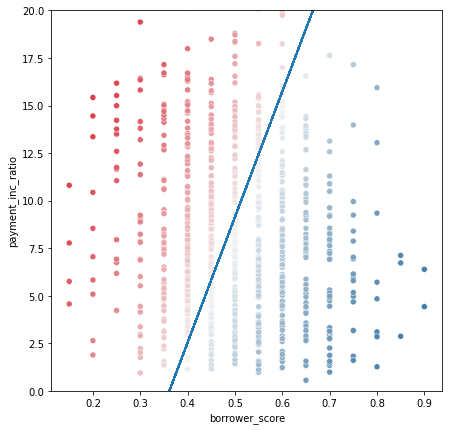

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
#pendiente
m = -w1/w2
#ordenada al origen
b = -w0/w2
#recta
x1 = X_test['borrower_score']
x2 = m*x1 + b

fig, ax = plt.subplots(figsize=(7,7))
g = sns.scatterplot(x='borrower_score', y='payment_inc_ratio', 
                   hue = 'default', data = df_concat,
                   palette = sns.diverging_palette(240, 10, n=9, as_cmap=True),
                   ax=ax, legend=False
                   )

ax.set_ylim(0,20)
ax.plot(x1, x2)

plt.show()
